# Configure font

In [1]:
# Configure Arial as the default font in all figures

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


arial_font_path = '/PATH/TO/ARIAL/FONT/arial.ttf'

fm.fontManager.addfont(arial_font_path)

plt.rcParams['font.family'] = 'Arial'

# Path to Zenodo files folder

In [1]:
path = 'PATH/TO/ZENODO/FILES/FOLDER'

# Figure S2

## Panel A

### Load the data

In [3]:
# Define WT sequences

proteins = {'P0A9X9': 'CspA',
            'P01053': 'CI-2A',
            'P06241': 'FYN-SH3'}

P0A9X9 = 'ATGACTGGTATTGTCAAATGGTTTAATGCAGATAAAGGTTTTGGTTTTATCACTCCAGATGATGGTTCTAAAGATGTCTTTGTCCATTTTTCTGCAATTCAAAATGATGGTTATAAATCTTTGGATGAAGGTCAAAAAGTCTCTTTCACTATTGAATCTGGTGCAAAAGGTCCAGCAGCAGGTAATGTCACTTCT'
P01053 = 'AAAACTGAATGGCCAGAATTGGTTGGTAAATCTGTCGAAGAAGCAAAAAAAGTTATCTTGCAAGATAAACCAGAAGCACAAATCATTGTTTTGCCAGTTGGTACTATTGTTACTATGGAATATAGAATTGATAGAGTCAGATTGTTTGTCGATAAATTGGATAATATCGCACAAGTTCCAAGAGTTGGT'
P06241 = 'ACGCTTTTCGTTGCATTGTATGATTATGAAGCAAGAACTGAAGATGATTTGTCTTTCCATAAAGGTGAAAAATTCCAAATCTTGAATTCTTCTGAAGGTGATTGGTGGGAAGCAAGATCTTTGACTACTGGTGAAACTGGTTATATCCCATCTAACTATGTCGCGCCTGTG'

prots=[P0A9X9,P01053,P06241]


In [4]:
# Load data

import pandas as pd

allvariants = pd.read_csv(path+"Fig2/Sparse_DTS_Cores_fitness_replicates.txt",
                         sep='\t', lineterminator='\n', low_memory = False)

allvariants = allvariants.sort_values('fitness', ascending = False)

# De-multiplex each protein's variants

ID_dict =  {'MT' : 'P0A9X9',
           'KT' : 'P01053',
           'TL' : 'P06241'}

allvariants["Protein"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    try:
        allvariants.at[index,'Protein']=ID_dict[row.aa_seq[:2]]
    except KeyError:
        continue

allvariants = allvariants.loc[allvariants['Protein'].notnull()].copy()
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma2_uncorr,fitness,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,50,...,0.149981,0.119072,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,2.0,NaN,NaN,False,False,False,270,...,0.143105,0.038189,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,36,...,0.164073,0.010316,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,103,...,0.151908,0.006908,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,0.0,NaN,True,False,False,False,869,...,0.140544,0.004089,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,141,...,0.496796,-4.493979,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,92,...,0.687984,-4.499378,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,NaN,NaN,NaN,True,False,False,66,...,0.688287,-4.586210,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,NaN,NaN,NaN,True,False,False,73,...,0.688254,-4.595361,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241


In [5]:
# Find core sequences

cores = {'P0A9X9' : [4,16,25,27,46,48,62],
        'P01053' : [11,18,27,45,47,49,55],
        'P06241' : [2,16,18,24,26,48,53]}

allvariants["core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    core=[]
    for i in cores[row.Protein]:
        core.append(row.aa_seq[i])
    allvariants.at[index,'core'] = ''.join(core)

In [6]:
# Define WT cores

from Bio.Seq import Seq

wt_cores = {}
for (prot_seq, prot_nam) in zip(prots, proteins.keys()):
    aa_seq=str(Seq(prot_seq).translate())
    wt_core=[]
    for i in cores[prot_nam]:
        wt_core.append(aa_seq[i])
    wt_cores[prot_nam]= ''.join(wt_core)
wt_cores

{'P0A9X9': 'VIVVVFV', 'P01053': 'VIIVLVI', 'P06241': 'FLFFIIV'}

In [7]:
# Find Hamming distance to WT

allvariants["wt_core"] = pd.Series(dtype="object") 
for index, row in allvariants.iterrows():
    wt = wt_cores[row.Protein]
    allvariants.at[index, 'wt_core']=wt
    if row.core == wt:
        allvariants.at[index, 'Nham_aa'] = 0
    else:
        allvariants.at[index, 'Nham_aa'] = sum(1 for a,b in zip(wt, row.core) if a!=b)
allvariants

,nt_seq,aa_seq,Nham_nt,Nham_aa,Nmut_codons,WT,indel,STOP,STOP_readthrough,count_e1_s0,...,sigma,growthrate1,growthrate1_sigma,growthrate2,growthrate2_sigma,growthrate,growthrate_sigma,Protein,core,wt_core
9873,NaN,TLMVALYDYEARTEDDLSLHKGEKLQVLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,50,...,0.141862,0.239689,0.030180,0.226946,0.009375,0.232834,0.009311,P06241,MLLLVVL,FLFFIIV
2746,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,3.0,NaN,NaN,False,False,False,270,...,0.118645,0.229667,0.014652,0.222635,0.008945,0.227526,0.007787,P01053,VIIIVVV,VIIVLVI
9771,NaN,TLMVALYDYEARTEDDLSFHKGEKLQILNSSEGDWWEARSLTTGET...,NaN,4.0,NaN,NaN,True,False,False,36,...,0.156208,0.220078,0.035262,0.221325,0.010256,0.225696,0.010252,P06241,MLFLIVI,FLFFIIV
0,NaN,KTEWPELVGKSIEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,NaN,False,False,False,103,...,0.136781,0.213351,0.021711,0.223492,0.009495,0.225473,0.008977,P01053,IIIIVVV,VIIVLVI
2869,NaN,KTEWPELVGKSVEEAKKVILQDKPEAQFIVLPVGTIVTMEYRIDRI...,NaN,4.0,NaN,True,False,False,False,869,...,0.102184,0.225144,0.010277,0.222607,0.008785,0.225288,0.006706,P01053,VIFIIVV,VIIVLVI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,NaN,TLVVALYDYEARTEDDVSFHKGEKMQMLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,141,...,0.417133,-0.080343,0.053032,-0.061804,0.031054,-0.069925,0.027377,P06241,VVFMMML,FLFFIIV
6480,NaN,TLIVALYDYEARTEDDISIHKGEKVQLLNSSEGDWWEARSLTTGET...,NaN,7.0,NaN,NaN,True,False,False,92,...,0.518747,-0.066789,0.054532,-0.072341,0.043004,-0.070280,0.034046,P06241,IIIVLVL,FLFFIIV
17285,NaN,MTGIIKWFNADKGFGFLTPDDGSKDVFIHFSAIQNDGYKSLDEGQK...,NaN,5.0,NaN,NaN,True,False,False,66,...,0.688287,NaN,NaN,-0.066794,0.043023,-0.075979,0.045173,P0A9X9,ILVILFF,VIVVVFV
14007,NaN,TLFVALYDYEARTEDDVSVHKGEKLQFLNSSEGDWWEARSLTTGET...,NaN,6.0,NaN,NaN,True,False,False,73,...,0.688254,NaN,NaN,-0.067366,0.043021,-0.076579,0.045171,P06241,FVVLFMM,FLFFIIV


In [8]:
import numpy as np
mean_median=allvariants.groupby('Protein')['fitness'].apply(lambda x: np.mean(x) - np.median(x)).to_frame()

In [9]:
# get AA properties

# based on AAindex1, a list of 566 features
# see feature indices and names here: https://www.genome.jp/aaindex/AAindex/list_of_indices

import pandas as pd
from protlearn.features import aaindex1

amino_acids = list('ACDEFGHIKLMNPQRSTVWY')
aaind, inds = aaindex1(amino_acids)#, standardize='zscore')
DTS_AA_props = pd.DataFrame(data=aaind, columns=inds, index=amino_acids)#.reset_index().rename(columns={'index':'AA'})
DTS_AA_props

/users/project/prj004631/aescobedo/miniconda3/envs/BIO/lib/python3.12/site-packages/protlearn/features/aaindex1.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160113,KARS160114,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122
A,4.35,0.61,1.18,1.56,1.00,0.77,0.37,0.357,52.6,16.0,...,6.0,6.000,6.0,6.0,12.000,6.000,12.000,0.000,6.000,0.000
C,4.65,1.07,1.89,1.23,0.06,0.65,0.84,0.346,68.3,168.0,...,6.0,16.670,12.0,22.0,28.000,9.330,28.000,0.000,11.333,6.000
D,4.76,0.46,0.05,0.14,0.44,0.65,0.97,0.511,68.4,-78.0,...,12.0,16.400,12.0,20.0,34.000,6.800,28.634,0.000,10.400,2.969
E,4.29,0.47,0.11,0.23,0.73,0.55,0.53,0.497,84.7,-106.0,...,12.0,21.000,14.0,26.0,40.000,6.670,28.731,0.000,10.667,1.822
F,4.66,2.02,1.96,2.03,0.60,0.98,0.53,0.314,113.9,189.0,...,18.0,23.250,18.0,24.0,48.000,6.000,26.993,0.000,12.000,2.026
G,3.97,0.07,0.49,0.62,0.35,0.65,0.97,0.544,36.3,-13.0,...,1.0,3.500,1.0,6.0,7.000,3.500,7.000,0.000,3.500,0.000
H,4.63,0.61,0.31,0.29,0.60,0.83,0.75,0.323,91.9,50.0,...,15.0,23.100,18.0,31.0,47.000,4.700,24.243,-1.734,10.400,1.605
I,3.95,2.22,1.45,1.67,0.73,0.98,0.37,0.462,102.0,151.0,...,12.0,15.600,12.0,18.0,30.000,6.000,24.841,-1.641,9.600,3.373
K,4.36,1.15,0.06,0.15,0.60,0.55,0.75,0.466,105.1,-141.0,...,12.0,24.500,18.0,31.0,37.000,6.170,22.739,-0.179,10.167,1.372
L,4.17,1.53,3.23,2.93,1.00,0.83,0.53,0.365,102.0,145.0,...,12.0,15.600,12.0,18.0,30.000,6.000,25.021,0.000,9.600,3.113


In [10]:
merge = mean_median.copy()
for key, value in wt_cores.items():
    corevolume = sum(int(DTS_AA_props.loc[i]['BIGC670101']) for i in value)
    merge.at[key,'CoreVolume']=corevolume

merge

,fitness,CoreVolume
Protein,,
P01053,0.119835,663.0
P06241,0.311082,730.0
P0A9X9,0.003756,640.0


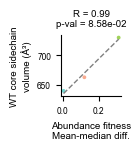

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

merge = merge.sort_values('fitness')

protein_colors = {'P06241': '#A1D359',
                 'P01053': '#F9AA8F',
                 'P0A9X9': '#73D8D3'}

g = sns.FacetGrid(data=merge, aspect=2)
g.map(plt.scatter, 'fitness', 'CoreVolume', s=3, 
      color=[protein_colors[idx] for idx in merge.index])  # Assign custom colors
#g.add_legend(bbox_to_anchor=(1.3,0.7), title='', fontsize=6)
g.fig.set_size_inches(0.7, 0.8)
g.tick_params(axis='both', which='major', labelsize=6)

x = merge[['fitness']].to_numpy()
y = merge[['CoreVolume']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
r, p = pearsonr(y.ravel(), y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness\nMean-median diff.', fontsize=7)
plt.ylabel('WT core sidechain\nvolume (Å³)', fontsize=7)
#plt.ylim(0,1)
#plt.yticks(np.arange(0,1.1,0.2))
#plt.annotate('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p),
#             fontsize=7, annotation_clip=False, xy=(0, 1.1))
plt.title('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p),
             fontsize=7)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('WTCoreVol_vs_mean-median_diff.svg', dpi=300, transparent=True)


## Panel B

In [12]:
sidechain_atoms = pd.read_csv(path+'FigS2/amino_acid_heavy_atoms_and_carbons.csv',sep=',',index_col=0)
sidechain_atoms=sidechain_atoms.drop('Amino Acid',axis=1)
sidechain_atoms=sidechain_atoms.rename(columns={'Heavy Atoms':'SCHeavyAtoms','Carbons in Sidechain':'SCCarbons'})
sidechain_atoms.loc[list('FLIMV')]

,SCHeavyAtoms,SCCarbons
F,7,7
L,4,4
I,4,4
M,4,3
V,3,3


In [13]:
merge = mean_median.copy()
for key, value in wt_cores.items():
    scheavyatoms = sum(int(sidechain_atoms.loc[i]['SCHeavyAtoms']) for i in value)
    sccarbons = sum(int(sidechain_atoms.loc[i]['SCCarbons']) for i in value)
    merge.at[key,'SCHeavyAtoms']=scheavyatoms
    merge.at[key,'SCCarbons']=sccarbons

merge

,fitness,SCHeavyAtoms,SCCarbons
Protein,,,
P01053,0.119835,25.0,25.0
P06241,0.311082,36.0,36.0
P0A9X9,0.003756,26.0,26.0


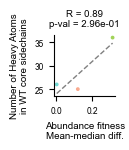

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

merge = merge.sort_values('fitness')

protein_colors = {'P06241': '#A1D359',
                 'P01053': '#F9AA8F',
                 'P0A9X9': '#73D8D3'}

g = sns.FacetGrid(data=merge, aspect=2)
g.map(plt.scatter, 'fitness', 'SCHeavyAtoms', s=3, 
      color=[protein_colors[idx] for idx in merge.index])  # Assign custom colors
#g.add_legend(bbox_to_anchor=(1.3,0.7), title='', fontsize=6)
g.fig.set_size_inches(0.7, 0.8)
g.tick_params(axis='both', which='major', labelsize=6)

x = merge[['fitness']].to_numpy()
y = merge[['SCHeavyAtoms']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
r, p = pearsonr(y.ravel(), y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness\nMean-median diff.', fontsize=7)
plt.ylabel('Number of Heavy Atoms\nin WT core sidechains', fontsize=7)
#plt.ylim(0,1)
#plt.yticks(np.arange(0,1.1,0.2))
#plt.annotate('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p),
#             fontsize=7, annotation_clip=False, xy=(0, 1.1))
plt.title('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p),
             fontsize=7)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('NrWTcoreHeavyAtoms_vs_mean-median_diff.svg', dpi=300, transparent=True)


## Panel C

In [15]:
merge=mean_median.copy()
proteins = ['P06241','P01053','P0A9X9']

for protein in proteins:
    WT_dG_df = pd.read_csv(path+'FigS2/'+protein+'_WT_dG_protherm.tsv', sep='\t')
    WT_dG_df['∆G_H2O_(kcal/mol)'] = pd.to_numeric(WT_dG_df['∆G_H2O_(kcal/mol)'], errors='coerce')
    merge.at[protein,'wt_dG']=-1*WT_dG_df['∆G_H2O_(kcal/mol)'].mean()
    merge.at[protein,'wt_dG_std']=WT_dG_df['∆G_H2O_(kcal/mol)'].std()
merge

,fitness,wt_dG,wt_dG_std
Protein,,,
P01053,0.119835,-7.133846,0.616449
P06241,0.311082,-5.173333,0.317543
P0A9X9,0.003756,-3.060000,0.322726


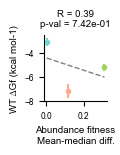

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Ensure merge is sorted by 'fitness'
merge = merge.sort_values('fitness')

protein_colors = {'P06241': '#A1D359',
                  'P01053': '#F9AA8F',
                  'P0A9X9': '#73D8D3'}

g = sns.FacetGrid(data=merge, aspect=2)

# Add scatter plot with custom colors and y-error bars
for idx, row in merge.iterrows():
    g.map(plt.errorbar, x=[row['fitness']], y=[row['wt_dG']],
          yerr=[row['wt_dG_std']], fmt='o', markersize=3, color=protein_colors[row.name])

g.fig.set_size_inches(0.7, 0.8)
g.tick_params(axis='both', which='major', labelsize=6)

x = merge[['fitness']].to_numpy()
y = merge[['wt_dG']].to_numpy()

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
r, p = pearsonr(y.ravel(), y_pred.ravel())

plt.plot(x, y_pred, color='Gray', linewidth=1, linestyle='--')
plt.xlabel('Abundance fitness\nMean-median diff.', fontsize=7)
plt.ylabel('WT ∆Gf (kcal mol-1)', fontsize=7)
plt.title('R = '+str(round(r, 2))+'\np-val = '+'{:0.2e}'.format(p), fontsize=7)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('Randomized_core_proteins_WT_dG_vs_mean-median_diff.svg', dpi=300, transparent=True)

## Panels D & E

In [17]:
from seaborn import kdeplot
import numpy as np

def normalize(values, bounds):
    return [bounds['desired']['lower'] + (x - bounds['actual']['lower']) * (bounds['desired']['upper'] - bounds['desired']['lower']) / (bounds['actual']['upper'] - bounds['actual']['lower']) for x in values]


allvariants['scaled_fitness'] = allvariants['fitness']
for protein in ['P06241','P01053','P0A9X9']:
    
    protein_variants = allvariants.loc[allvariants['Protein']==protein].copy()

    reference=allvariants.loc[allvariants['Protein']==protein].sort_values(['Nham_aa','fitness'], ascending=[True,False]).iloc[0]['core']
    fig = plt.figure(figsize=(0,0))
    lines = kdeplot(data=protein_variants,x='fitness',linewidth=0).get_lines()
    for line in lines:
        x, y = line.get_data()
        mode=(x[np.argmax(y)])
    plt.close()
        
    protein_variants_scaled = protein_variants.copy()    
    
    protein_variants_scaled['fitness']=normalize(list(protein_variants_scaled['fitness']),{'actual': {'lower': mode, 'upper': protein_variants_scaled.loc[protein_variants_scaled['core']==reference]['fitness'].iloc[0]}, 'desired': {'lower': -1, 'upper': 0}})
    allvariants.loc[protein_variants_scaled.index, 'scaled_fitness'] = protein_variants_scaled['fitness']    

In [18]:
import pandas as pd

DTS_AA_props = pd.concat([DTS_AA_props,sidechain_atoms],axis=1)

aa_props_dict = DTS_AA_props.to_dict(orient="index")

def compute_sequence_props(sequence, aa_props_dict):
    property_sums = {prop: 0 for prop in DTS_AA_props.columns}
    for aa in sequence:
        if aa in aa_props_dict:
            for prop, value in aa_props_dict[aa].items():
                property_sums[prop] += value
    return property_sums

result_data = []
for sequence in allvariants["core"]:
    sequence_props = compute_sequence_props(sequence, aa_props_dict)
    result_data.append(sequence_props)

AA_properties_sum = pd.DataFrame(result_data, columns=DTS_AA_props.columns)
AA_properties_sum.index = allvariants.index

AA_properties_sum


,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122,SCHeavyAtoms,SCCarbons
9873,29.10,9.94,17.75,16.96,6.64,6.26,3.50,2.527,675.9,950.0,...,78.0,130.0,208.014,44.0,179.428,0.000,70.0,27.108,26,25
2746,27.65,11.94,8.67,9.57,5.47,6.86,2.59,2.930,646.4,945.0,...,60.0,102.0,186.028,42.0,170.523,-4.923,64.8,34.119,24,24
9771,29.37,12.02,15.07,15.33,5.88,6.56,3.34,2.649,704.7,1028.0,...,90.0,142.0,232.007,44.0,182.061,-3.282,73.0,23.654,30,29
0,27.65,12.84,9.04,10.10,5.38,6.86,2.59,3.006,663.3,973.0,...,66.0,108.0,192.021,42.0,171.364,-6.564,65.4,31.492,25,25
2869,28.36,12.64,9.55,10.46,5.25,6.86,2.75,2.858,675.2,1011.0,...,72.0,114.0,210.021,42.0,173.516,-4.923,67.8,30.145,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,30.29,9.73,15.36,16.12,6.24,6.71,3.72,2.336,679.2,952.0,...,96.0,168.0,246.014,48.0,194.046,0.000,80.4,25.107,29,26
6480,28.09,12.36,12.97,13.15,5.83,6.56,2.91,2.888,680.2,989.0,...,72.0,114.0,198.014,42.0,172.565,-4.923,66.0,28.345,26,26
17285,29.51,12.86,14.36,14.40,5.48,6.56,3.23,2.668,720.9,1093.0,...,90.0,132.0,240.007,42.0,177.710,-3.282,71.4,23.024,33,33
14007,30.43,10.57,14.65,15.19,5.84,6.71,3.61,2.355,695.4,1017.0,...,96.0,158.0,254.014,46.0,189.695,0.000,78.8,24.477,32,30


In [19]:
wt_properties_sum = {}
for protein, wt_sequence in wt_cores.items():
    wt_properties_sum[protein] = compute_sequence_props(wt_sequence, aa_props_dict)

percent_change_data = []
for idx, row in allvariants.iterrows():
    protein_name = row["Protein"]
    sequence_props = compute_sequence_props(row["core"], aa_props_dict)
    wt_props = wt_properties_sum[protein_name]

    percent_change = {
        prop: (sequence_props[prop] - wt_props[prop])
        for prop in DTS_AA_props.columns
    }
    percent_change_data.append(percent_change)

percent_change_df = pd.DataFrame(percent_change_data, columns=DTS_AA_props.columns)
percent_change_df.index = allvariants.index
percent_change_df

,ANDN920101,ARGP820101,ARGP820102,ARGP820103,BEGF750101,BEGF750102,BEGF750103,BHAR880101,BIGC670101,BIOV880101,...,KARS160115,KARS160116,KARS160117,KARS160118,KARS160119,KARS160120,KARS160121,KARS160122,SCHeavyAtoms,SCCarbons
9873,-0.90,-3.41,4.66,3.46,1.56,-0.45,2.700000e-01,-0.090,-56.9,-187.0,...,-18.0,-8.0,-49.993,2.0,-0.254,3.282,-3.8,5.171,-10,-11
2746,-0.22,-0.21,-2.15,-1.79,-0.18,0.15,-1.600000e-01,0.021,-16.9,-22.0,...,-6.0,-6.0,-5.993,0.0,-1.021,0.000,-0.6,2.887,-1,-1
9771,-0.63,-1.33,1.98,1.83,0.80,-0.15,1.100000e-01,0.032,-28.1,-109.0,...,-6.0,4.0,-26.000,2.0,2.379,0.000,-0.8,1.717,-6,-7
0,-0.22,0.69,-1.78,-1.26,-0.27,0.15,-1.600000e-01,0.097,0.0,6.0,...,0.0,0.0,0.000,0.0,-0.180,-1.641,0.0,0.260,0,0
2869,0.49,0.49,-1.27,-0.90,-0.40,0.15,4.440892e-16,-0.051,11.9,44.0,...,6.0,6.0,18.000,0.0,1.972,0.000,2.4,-1.087,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10635,0.29,-3.62,2.27,2.62,1.16,0.00,4.900000e-01,-0.281,-53.6,-185.0,...,0.0,30.0,-11.993,6.0,14.364,3.282,6.6,3.170,-7,-10
6480,-1.91,-0.99,-0.12,-0.35,0.75,-0.15,-3.200000e-01,0.271,-52.6,-148.0,...,-24.0,-24.0,-59.993,0.0,-7.117,-1.641,-7.8,6.408,-10,-10
17285,1.15,2.02,5.55,5.00,0.05,-0.30,4.800000e-01,-0.038,79.5,138.0,...,30.0,30.0,41.972,0.0,5.876,-1.641,4.8,-12.375,7,7
14007,0.43,-2.78,1.56,1.69,0.76,0.00,3.800000e-01,-0.262,-37.4,-120.0,...,0.0,20.0,-3.993,4.0,10.013,3.282,5.0,2.540,-4,-6


P06241
Fraction of folded variants with volume increase: 0.014879107253564786
Number of folded variants with volume increase: 24
Total number of folded variants: 1613
Fraction of  variants with volume increase: 0.017248295226634576
P01053
Fraction of folded variants with volume increase: 0.321285140562249
Number of folded variants with volume increase: 80
Total number of folded variants: 249
Fraction of  variants with volume increase: 0.6979730775181804
P0A9X9
Fraction of folded variants with volume increase: 0.8125
Number of folded variants with volume increase: 13
Total number of folded variants: 16
Fraction of  variants with volume increase: 0.9451764705882353


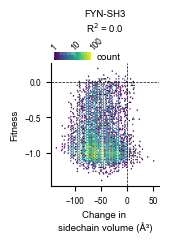

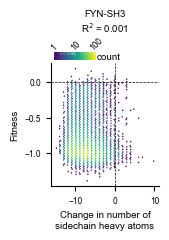

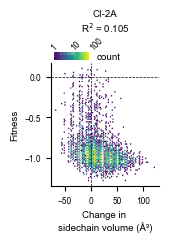

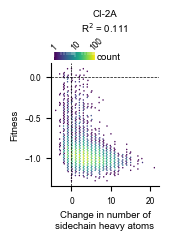

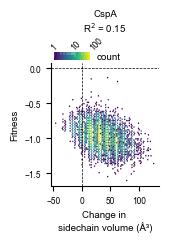

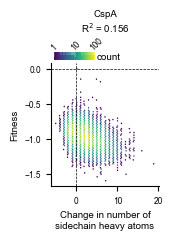

In [20]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, AutoLocator

proteins = ['P06241','P01053','P0A9X9']
subcategories = {'Volume':'Volume',
                'Number of sidechain heavy atoms':'#SC atoms'}
protein_names = {'P06241': 'FYN-SH3',
                 'P01053': 'CI-2A',
                 'P0A9X9': 'CspA'}

for protein in proteins:
    bestindices = {'Volume': 'BIGC670101', 'Number of sidechain heavy atoms': 'SCHeavyAtoms'}
    for prop in ['Volume','Number of sidechain heavy atoms']:
        x = percent_change_df.loc[allvariants['Protein']==protein][[bestindices[prop]]].to_numpy()
        y = allvariants.loc[allvariants['Protein']==protein][['scaled_fitness']].to_numpy()
        model = LinearRegression()
        model.fit(x,y)
        y_pred = model.predict(x)
        
        fig, ax = plt.subplots(figsize=(1.4,1.6))
        hbin=ax.hexbin(y= allvariants.loc[allvariants['Protein']==protein][['scaled_fitness']],x=percent_change_df.loc[allvariants['Protein']==protein][[bestindices[prop]]],bins='log',gridsize=75,rasterized=True,linewidths=0)
        #ax.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black',lw=0.5)
        
        
        plt.axvline(0, ls='--', color='black', lw=0.5)
        plt.axhline(0, ls='--', color='black', lw=0.5)
        
        plt.title(protein_names[protein]+'\nR$^2$ = '+str(round(r2_score(y,y_pred),3)),fontsize=7, color='k', loc='center', pad=22)
        
        plt.ylabel('Fitness', fontsize=7)
        plt.xticks(fontsize=6)
        if prop == 'Volume':
            plt.xlabel('Change in \nsidechain volume (Å³)', fontsize=7)
            merge=percent_change_df.loc[allvariants['Protein']==protein][['BIGC670101']].merge(allvariants.loc[allvariants['Protein']==protein][['scaled_fitness']],left_index=True,right_index=True)
            print(protein)
            print('Fraction of folded variants with volume increase: '+str(len(merge.loc[merge['BIGC670101']>0].loc[merge['scaled_fitness']>-0.5])/len(merge.loc[merge['scaled_fitness']>-0.5])))
            print('Number of folded variants with volume increase: '+str(len(merge.loc[merge['BIGC670101']>0].loc[merge['scaled_fitness']>-0.5])))
            print('Total number of folded variants: '+str(len(merge.loc[merge['scaled_fitness']>-0.5])))
            print('Fraction of  variants with volume increase: '+str(len(merge.loc[merge['BIGC670101']>0])/len(merge)))
        else:
            plt.xlabel('Change in number of\nsidechain heavy atoms',fontsize=7)
        plt.yticks(fontsize=6)
        ax = plt.gca()

        auto_locator = AutoLocator()
        default_ticks = auto_locator.tick_values(*ax.get_xlim())

        if len(default_ticks) > 1:
            tick_interval = default_ticks[1] - default_ticks[0]
            refined_locator = MultipleLocator(tick_interval*2)  # Half the default interval
            ax.xaxis.set_major_locator(refined_locator)
        ax.spines[['top','right']].set_visible(False)
        ax.set_rasterization_zorder(0)
        fmt = '%1.f'
        cax=fig.add_axes([0.15,0.9,0.3,0.05])
        cb=fig.colorbar(hbin, ax=ax, shrink=0.7,format=fmt,location='top',cax=cax)
        cb.outline.set_visible(False)
        cb.ax.tick_params(axis='both', which='both',direction='in', color='white',width=0.25)
        cb.ax.xaxis.set_tick_params(pad=0)
        cb.set_ticks([1,10,100])
        cb.set_ticklabels([1,10,100], fontsize=6, rotation=45)
        ax1 = cb.ax
        ax1.text(100,0.1,'count',rotation=0, fontsize=7)
        
        plt.rcParams['svg.fonttype'] = 'none'
#        plt.savefig(protein+'_fitness_vs_change_in_'+bestindices[prop]+'.svg', dpi=300, transparent=True, bbox_inches='tight')




## Panel F

In [21]:
import pandas as pd
AAont = pd.read_csv(path+'FigS2/AAontology_SupplTable3.txt', sep='\t', encoding = "ISO-8859-1", index_col=0).drop('Unnamed: 5', axis=1)
AAont

,category,subcategory,scale_name,scale_description
scale_id,,,,
LINS030110,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),Total median accessible surfaces of whole resi...
LINS030113,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),% total accessible surfaces of whole residues ...
JANJ780101,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessible surface area (Janin et al.,..."
JANJ780103,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Percentage of exposed residues (Janin et al., ..."
LINS030104,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),Total median accessible surfaces of whole resi...
...,...,...,...,...
GEOR030108,Structure-Activity,Stability (helix-coil),Linker (helical),Linker propensity from helical (annotated by D...
FINA770101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),Helix-coil equilibrium constant (Finkelstein-P...
PTIO830101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),Helix-coil equilibrium constant (Ptitsyn-Finke...


In [22]:
aaindex_featureNames = pd.read_csv(path+'FigS2/AAindex_featureNames.txt',sep='\t', header=None)

aaindex_featureNames = aaindex_featureNames[0].str.split(' ', n=1, expand = True)
aaindex_id = aaindex_featureNames[0]
aaindex_featureNames = pd.concat([aaindex_id, aaindex_featureNames[1].str.split('(', n=1, expand=True)], axis=1)
aaindex_featureNames.columns = ['id', 'name', 'source']
aaindex_featureNames['name'] = aaindex_featureNames['name'].str.removesuffix(' ')
aaindex_featureNames['source'] = aaindex_featureNames['source'].str.removesuffix(')')
aaindex_featureNames = aaindex_featureNames.set_index('id')
aaindex_featureNames.at['SCHeavyAtoms','name']='Number of sidechain heavy atoms'
aaindex_featureNames.at['SCHeavyAtoms','source']='Escobedo, 2025'
aaindex_featureNames.at['SCCarbons','name']='Number of sidechain carbon atoms'
aaindex_featureNames.at['SCCarbons','source']='Escobedo, 2025'

aaindex_featureNames

,name,source
id,,
ANDN920101,alpha-CH chemical shifts,"Andersen et al., 1992"
ARGP820101,Hydrophobicity index,"Argos et al., 1982"
ARGP820102,Signal sequence helical potential,"Argos et al., 1982"
ARGP820103,Membrane-buried preference parameters,"Argos et al., 1982"
BEGF750101,Conformational parameter of inner helix,"Beghin-Dirkx, 1975"
...,...,...
KARS160120,Weighted minimum eigenvalue based on the atomi...,"Karkbara-Knisley, 2016"
KARS160121,Weighted average eigenvalue based on the atomi...,"Karkbara-Knisley, 2016"
KARS160122,Weighted second smallest eigenvalue of the wei...,"Karkbara-Knisley, 2016"


In [23]:
AAont.at['SCHeavyAtoms','category']='#SC atoms'
AAont.at['SCHeavyAtoms','subcategory']='#SC atoms'
AAont.at['SCHeavyAtoms','scale_name']='Number of sidechain heavy atoms'
AAont.at['SCHeavyAtoms','scale_description']='Number of sidechain heavy atoms'

AAont.at['SCCarbons','category']='#SC atoms'
AAont.at['SCCarbons','subcategory']='#SC atoms'
AAont.at['SCCarbons','scale_name']='Number of sidechain carbon atoms'
AAont.at['SCCarbons','scale_description']='Number of sidechain carbon atoms'

AAont

,category,subcategory,scale_name,scale_description
scale_id,,,,
LINS030110,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),Total median accessible surfaces of whole resi...
LINS030113,ASA/Volume,Accessible surface area (ASA),ASA (folded coil/turn),% total accessible surfaces of whole residues ...
JANJ780101,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Average accessible surface area (Janin et al.,..."
JANJ780103,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),"Percentage of exposed residues (Janin et al., ..."
LINS030104,ASA/Volume,Accessible surface area (ASA),ASA (folded protein),Total median accessible surfaces of whole resi...
...,...,...,...,...
PTIO830101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),Helix-coil equilibrium constant (Ptitsyn-Finke...
SUEM840101,Structure-Activity,Stability (helix-coil),Stability (helix-coil),"Zimm-Bragg parameter s at 20 C (Sueki et al., ..."
SUEM840102,Structure-Activity,Unclassified (Structure-Activity),Stability (extended-coil),Zimm-Bragg parameter sigma x 1.0E4 (Sueki et a...


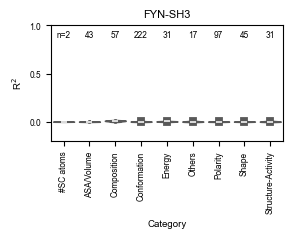

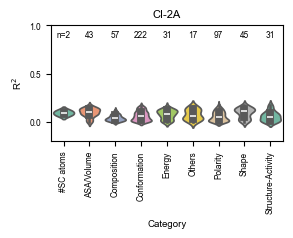

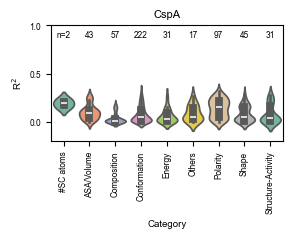

In [24]:
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

proteins = ['P06241', 'P01053', 'P0A9X9']
proteins_dict = {'P06241': 'FYN-SH3',
                 'P01053': 'CI-2A',
                 'P0A9X9': 'CspA'}

for protein in proteins:
    r_all_data = []
    for prop in percent_change_df.columns:
        x = percent_change_df[prop].loc[allvariants['Protein'] == protein]
        y = allvariants.loc[allvariants['Protein'] == protein]['scaled_fitness']

        if x.nunique() > 1 and y.nunique() > 1:
            r, pval = pearsonr(x, y)
        else:
            r, pval = None, None
        r_all_data.append({'prop': prop, 'r': r, 'r_square': r**2 if r is not None else None, 'r_pval': pval})

    r_all = pd.DataFrame(r_all_data).set_index('prop').dropna(subset=['r'])

    r_all['name'] = aaindex_featureNames.loc[r_all.index, 'name']
    r_all['category'] = AAont.loc[r_all.index, 'category']
    r_all['subcategory'] = AAont.loc[r_all.index, 'subcategory']
    r_all = r_all.sort_values('category', ascending=True)

    plt.subplots(figsize=(3, 1.5))
    sns.violinplot(x='category', y='r_square', data=r_all, palette='Set2', hue='category', legend=False)

    category_counts = r_all['category'].value_counts()
    for i, category in enumerate(r_all['category'].unique()):
        n = category_counts[category]
        if i == 0:
            plt.text(i, 0.9, f'n={n}', ha='center', va='center', fontsize=6)
        else:
            plt.text(i, 0.9, f'{n}', ha='center', va='center', fontsize=6)

    plt.xticks(rotation=90, fontsize=6)
    plt.yticks(fontsize=6)
    plt.xlabel('Category', fontsize=7)
    plt.ylabel('R$^2$', fontsize=7)
    plt.ylim(-0.2, 1)
    plt.title(proteins_dict[protein], fontsize=8)
    plt.rcParams['svg.fonttype'] = 'none'
#    plt.savefig(protein+'correl_vs_500aaindex_r2_by_category.svg', dpi=300, transparent=True, bbox_inches='tight')